<a href="https://colab.research.google.com/github/jiyoung-99/boiler-plate-node/blob/master/n133a_high_dimensional_data_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from numpy.linalg import eig

In [14]:
matrix = np.array([[4, 2],
                   [2, 4]])
print(matrix)
means = np.mean(matrix.T, axis=1)
print(means)
# 각 행에서 평균을 뺌
centering_data = matrix - means
print(centering_data)
stds = np.std(matrix.T, axis=1)
print(stds)
# 각 행과 표준편차를 나누어줌
standardized_data = centering_data/stds
print(standardized_data)
# 공분산
covs = np.cov(centering_data.T)
print(covs)
# 고유값, 고유벡터
values, vectors = eig(covs)
print('eigenvalue', values)
print('eigenvector', vectors)

[[4 2]
 [2 4]]
[3. 3.]
[[ 1. -1.]
 [-1.  1.]]
[1. 1.]
[[ 1. -1.]
 [-1.  1.]]
[[ 2. -2.]
 [-2.  2.]]
eigenvalue [4.0000000e+00 4.4408921e-16]
eigenvector [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


## 2. penguins dataset을 사용하여 numerical feature 6개에 대해서 pca를 시행, 이후 pc1-pc2를 사용하여 scatter plot을 그리세요.

<img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png' width = 450>

- [Palmer-penguins](https://github.com/allisonhorst/palmerpenguins) 

데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>



In [19]:
!pip install palmerpenguins


In [20]:
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

In [39]:
penguins = load_penguins().dropna()
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [40]:
penguins_data = penguins.select_dtypes(np.number)
penguins_data = penguins_data.drop('year', axis=1)
penguins_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [62]:
scaler = StandardScaler()
standard_penguines = scaler.fit_transform(penguins_data)
print("\n Standardized Data: \n", standard_penguines)
pca = PCA(2)
pca.fit(standard_penguines)
print("\n Eigenvectors(고유벡터): \n", pca.components_)
print("\n Eigenvalues(고유값): \n",pca.explained_variance_)
B = pca.transform(standard_penguines)
print("\n Projected Data: \n", B)


 Standardized Data: 
 [[-0.89604189  0.7807321  -1.42675157 -0.56847478]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608 ]
 ...
 [ 1.02687621  0.52644436 -0.56928439 -0.53738048]
 [ 1.24663828  0.93330475  0.64546078 -0.13315457]
 [ 1.13675725  0.7807321  -0.2120064  -0.53738048]]

 Eigenvectors(고유벡터): 
 [[ 0.45375317 -0.39904723  0.576825    0.54967471]
 [ 0.6001949   0.79616951  0.00578817  0.07646366]]

 Eigenvalues(고유값): 
 [2.75362487 0.7804609 ]

 Projected Data: 
 [[-1.85359302e+00  3.20693765e-02]
 [-1.31625406e+00 -4.43526765e-01]
 [-1.37660509e+00 -1.61230478e-01]
 [-1.88528838e+00 -1.23512351e-02]
 [-1.91998074e+00  8.17598126e-01]
 [-1.77302031e+00 -3.66222957e-01]
 [-8.18496250e-01  5.01243084e-01]
 [-1.79895773e+00 -2.45393945e-01]
 [-1.95614892e+00  9.98282895e-01]
 [-1.56952316e+00  5.78081948e-01]
 [-1.74800122e+00 -6.10244291e-01]
 [-1.57577371e+00  8.68357265e-02]
 [-8.04720190e-01  1.29355592e+00]
 [-2.35017809e+00

In [63]:
projected_penguins = pd.DataFrame(B, columns = ['PC1', 'PC2'])
projected_penguins.head()

,PC1,PC2
0,-1.853593,0.032069
1,-1.316254,-0.443527
2,-1.376605,-0.161230
3,-1.885288,-0.012351
4,-1.919981,0.817598


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


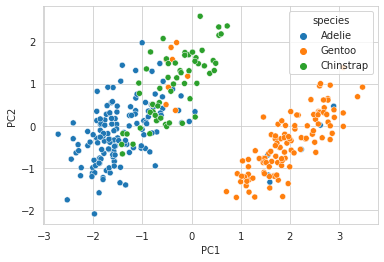

In [64]:
sns.scatterplot(projected_penguins['PC1'], projected_penguins['PC2'], hue =penguins['species'] )

In [65]:
###### 다른 방법
penguins.head()
penguins_info = penguins.select_dtypes(exclude='float')
penguins_info.head()

,species,island,sex,year
0,Adelie,Torgersen,male,2007
1,Adelie,Torgersen,female,2007
2,Adelie,Torgersen,female,2007
4,Adelie,Torgersen,female,2007
5,Adelie,Torgersen,male,2007


In [66]:
penguins_data2 = penguins.select_dtypes('float')
penguins_data2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [68]:
from sklearn.preprocessing import StandardScaler

In [79]:
data_scaled = StandardScaler().fit_transform(penguins_data2)

(333, 4)

In [83]:

pca = PCA(n_components=2)
pca.fit(data_scaled)
pca_transform = pca.transform(data_scaled)
penguins_df = pd.DataFrame(data=pca_transform, columns=['PC1', 'PC2'])
penguins_df.head()


,PC1,PC2
0,-1.853593,0.032069
1,-1.316254,-0.443527
2,-1.376605,-0.161230
3,-1.885288,-0.012351
4,-1.919981,0.817598


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


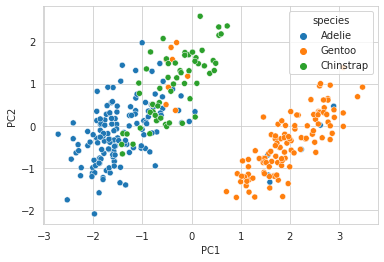

In [86]:
sns.scatterplot(penguins_df['PC1'], penguins_df['PC2'], hue=penguins_info['species'])

## 🔥 도전 과제

모두 하면 됩니다.

### 1.  "One-hot-encoding"을 이용하여 categorical 데이터를 numerical 하게 변환시켜서 PCA를 다시 시행해보세요.

### 2. "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?
